# Numerical approximation

- - - - - - - - - - - - - - -

Numerical approximation is the application of using computer algorithms to find a(n) (root or eigen-) value or values up to an acceptable error tolerance, which is the numerical variation allowed in results. The following topics will be covered:
- Least squares fitting
    - Linear
    - Nonlinear
        - Polynomial
        - Euler
    - Trigonometric
- Fast Fourier transform
- Power iteration
- Root-finding iteration
    - Fixed-point
    - Newton
    - Broyden
    - Steepest descent

Further readings and useful links are also provided at the bottom.

- - - - - - - - - - - - - - -

### Least squares fitting

Least squares fitting is a method at finding the best-fitting curve given a set of points by minimising the sum of the squares of the offsets of the points from the curve. The fitting methods covered are listed below:
- Linear
- Polynomial
- Euler
- Trigonometric

Both the linear and polynomial methods already exist in the NumPy library.

In [1]:
from pprint import pprint
import numpy as np
from numpy import linalg as LA
import scipy.integrate as integrate
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

#### Linear

In [2]:
def linearLeastSquares(x, y):
    '''The linear least-squares algorithm is already part of NumPy's library:'''
    '''https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html'''
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]

    return m, c

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 6, 12, 24, 48, 96, 192, 384, 786])

The following chart displays the given points and its linear fit.

For y = mx + c, the values "m" and "c" are:
array([  56.69090909, -142.18181818])


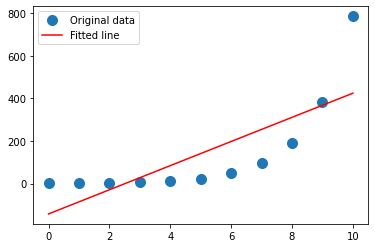

In [3]:
m, c = linearLeastSquares(x, y)

print('For y = mx + c, the values "m" and "c" are:')
pprint(np.array([m, c]))

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, m*x + c, 'r', label='Fitted line')
plt.legend()
plt.show()

#### Polynomial

In [4]:
def nonlinearPLeastSquares(x, y):
    '''The nonlinear least-squares algorithm can be reduced to the polyfit function, which is already part of NumPy's library:'''
    '''https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html?highlight=polyfit#numpy.polyfit'''
    curve = np.polyfit(x, y, 2)
    return curve

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 6, 12, 24, 48, 96, 192, 384, 786])

The following chart displays the given points and its polynomial fit.

For y = Ax^2 + Bx + C, the values "A", "B", and "C" are:
array([ 14.60839161, -89.39300699,  76.94405594])


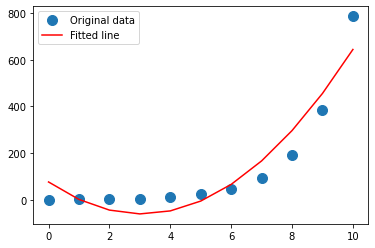

In [5]:
curve = nonlinearPLeastSquares(x, y)

print('For y = Ax^2 + Bx + C, the values "A", "B", and "C" are:')
pprint(curve)

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, curve[0]*x**2 + curve[1]*x + curve[2], 'r', label='Fitted line')
plt.legend()
plt.show()

#### Euler

In [6]:
def nonlinearELeastSquares(x, y):
    '''For the Euler function, we need to find the length of the array and the natural log of y.'''
    m = len(x)
    ln_y = np.log(y)
    xln_y = x*np.log(y)

    '''Variables a and b are dependent on the summations of the following functions.'''
    x_sum = np.sum(x)
    y_sum = np.sum(y)
    x2_sum = np.sum(x**2)
    ln_y_sum = np.sum(ln_y)
    xln_y_sum = np.sum(xln_y)

    '''a is defined as (m*SUM(xln_y) - SUM(x)*SUM(ln_y))/(m*SUM(x**2) - (SUM(x)**2)).'''
    a = (m*xln_y_sum - x_sum*ln_y_sum)/(m*x2_sum - (x_sum)**2)
    
    '''ln(b) is defined as (SUM(x**2)*SUM(xln_y) - SUM(x*ln(y))*SUM(x))/(m*SUM(x**2) - (SUM(x)**2)).'''
    ln_b = (x2_sum*ln_y_sum - xln_y_sum*x_sum)/(m*x2_sum - (x_sum)**2)
    
    '''where b is e**(ln(b)).'''
    b = np.exp(ln_b)

    return a, b

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 2, 3, 6, 12, 24, 48, 96, 192, 384, 786])

The following chart displays the given points and its Euler fit.

For y = b*e^(ax), the values "a" and "b" are:
array([0.6706626, 0.8861693])


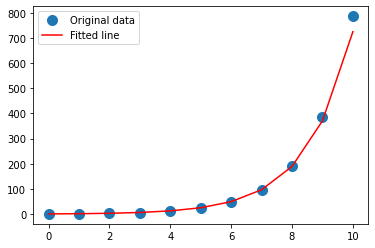

In [7]:
a, b = nonlinearELeastSquares(x, y)

print('For y = b*e^(ax), the values "a" and "b" are:')
pprint(np.array([a, b]))

plt.plot(x, y, 'o', label='Original data', markersize=10)
plt.plot(x, b*np.exp(a*x), 'r', label='Fitted line')
plt.legend()
plt.show()

#### Trigonometric

In [8]:
def trigonometricLeastSquares(f_1, f_2, degree = 2):
    a_n = np.zeros([])
    b_n = np.zeros([])
    
    '''For the trigonometric least-squares algorithm, the following integrals will be used.'''
    '''The integration function is part of SciPy's library.'''
    for i in range(degree + 1):    
        a = ((1/np.pi)*integrate.quad(lambda x: f_1[0]*(np.cos(i*x)), f_1[1], f_1[2])[0])+((1/np.pi)*integrate.quad(lambda x: f_2[0]*(np.cos(i*x)), f_2[1], f_2[2])[0])
        a_n = np.insert(a_n, i, a)

    for j in range(degree):
        b = ((1/np.pi)*integrate.quad(lambda x: f_1[0]*(np.sin(i*x)), f_1[1], f_1[2])[0])+((1/np.pi)*integrate.quad(lambda x: f_2[0]*(np.sin(j*x)), f_2[1], f_2[2])[0])
        b_n = np.insert(b_n, j, b)

    return a_n, b_n

f_1 = np.array([0, -np.pi, np.pi/4])
f_2 = np.array([3, np.pi/4, np.pi])

The following chart displays the given points and its trigonometric fit.

Solution:
array([ 2.25      , -0.67523724, -0.47746483,  0.        ])


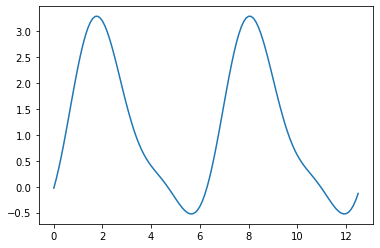

In [9]:
'''The degree here is set to 2, though it can be set higher if there's a need for it.'''
solution = trigonometricLeastSquares(f_1, f_2, degree = 2)

print('Solution:')
pprint(solution[0])

'''Note: solution[0] is a_n and solution[1] is b_n.'''
x = np.arange(0, 4*np.pi, 0.1) ##start, stop, step
y = (1/2)*solution[0][0] + solution[0][1]*np.cos(x) + solution[1][1]*np.sin(x) + solution[0][2]*np.cos(2*x)

plt.plot(x,y)
plt.show()

### Fast Fourier transform

The Fast Fourier transform is an algorithm that calculates the discrete Fourier transform which decomposes functions from the time spectrum into the frequency spectrum. This allows a signal taken from its original domain and determines the dominant frequency across the entire domain. The main algorithm is the <i>Cooley-Tukey algorithm</i>, but a number of others (i.e. <i>Bruun's</i>, <i>Rader's</i>, <i>Bluestein's</i>) also exist.

The discrete Fourier transform is defined as:
- $x_k = \sum\limits_{n = 0}^{N - 1} \, x_n e^{\dfrac{-2\pi ikn}{N}}$

where
- $N$ is the number of samples
- $n$ is the current sample
- $x_n$ is the value of the signal at time $n$
- $k$ is the current frequency

In [10]:
def fft():
    '''The Fast Fourier transform algorithm is already part of NumPy's library:'''
    '''https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html'''
    t = np.linspace(0, 0.5, 100)
    s = 0.5 * np.sin(15 * np.pi * t) + 0.5 * np.cos(100 * np.pi * t)

    return t, s

t, s = fft()

The following chart displays the solution given the frequencies provided.

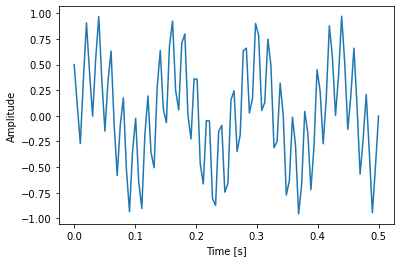

In [11]:
plt.ylabel("Amplitude")
plt.xlabel("Time [s]")
plt.plot(t, s)
plt.show()

### Power iteration

Power iteration is a method designed to circumvent the time-consuming efforts to solve polynomials of larger powers, which is also highly sensitive to rounding errors. To start off, find a diagonalisable matrix <i>A</i>'s most dominant eigenvalue, which is defined as:
- Let $\lambda_1, \lambda_2, \dots, and \lambda_n$ be the eigenvalues of an $n \times n$ matrix <i>A</i>.
- $\lambda_1$ is called the <b>dominant eigenvalue</b> of <i>A</i> if $\mid \lambda_1 \mid > \mid \lambda_i \mid$ for $i = 2, \dots, n$.

Once we have the dominant eigenvalue, the power method is defined as:
- $x_k = Ax_{k-1} = A(A^{k-1}x_0) = A^{k}(x_0)$

where $x_0$ is the initial approximation of one of the dominant eigenvectors of <i>A</i>.

In [12]:
def PowerMethod(A, b, step = 25):
    
    '''Let b be the starting vector, and for this example, it'll be done in 25 steps.'''
    results = []
    
    for i in range(step):
        '''Updates p as the max value of the array and this is needed to be done through every iteration.'''
        p = np.amax(b)
        
        '''Resets b after dividing the array with the max value.'''
        b = b/p
        
        '''Dot product of the original matrix A and the updated array b.'''
        b = A @ b
        
        results.append(b)
    
    return results

A = np.array([[0,2,1],[1,1,0],[3,0,2]])
b = np.array([0,2,1])

solution = PowerMethod(A, b, step = 25)

df = pd.DataFrame(solution/np.linalg.norm(solution))
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

,x_1,x_2,x_3
0,0.138409,0.055364,0.055364
1,0.066436,0.077509,0.210382
2,0.096158,0.037880,0.163177
3,0.081068,0.045477,0.208602
4,0.079503,0.033586,0.175274
5,0.076581,0.035721,0.186065
6,0.076621,0.033415,0.179087
7,0.076024,0.034017,0.181788
8,0.076083,0.033513,0.180187
9,0.075958,0.033674,0.180859


### Root-finding iteration

Root-finding methods are designed to find the roots (or zeroes) of continuous functions. The following methods are covered:
- Fixed-point
- Newton
- Broyden
- Steepest descent

All methods will be further elaborated in their own section.

#### Fixed-point

The fixed-point method is defined as:
- $x_{n+1} = f(x_n)$ for $n = 0, 1, 2, \dots$

which should give rise to a sequence $x_0, x_1, x_2, \dots$ so that it converges to $f(x) = x$.

In [13]:
def FixedPoint(x, step = 25):
    
    results = []
    
    for i in range(step):
        
        '''Reorganising the system of equations so that we can isolate x_1 and x_2 while fitting in the values of x.'''
        x_1 = 1/np.sqrt(5)*x[1]
        x_2 = (1/4)*(np.sin(x[0])+np.cos(x[1]))
        
        '''G is the solution, though afterwards x is reset with the new values of x_1 and x_2 so the loop can meaningfully continue.'''
        G = np.array([x_1, x_2])
        x = [x_1, x_2]
        
        results.append(G)
        
    return results

'''A isn't used but there to show the system of equations. x is the point near the solution.'''
A = np.array([['5x_1**2 - x_2**2 = 0'],['x_2 - (1/4)(sin(x_1) + cos(x_2)) = 0']])
x = [1/4, 1/4]

solution = FixedPoint(x, step = 25)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2'}, inplace = True)
df

,x_1,x_2
0,0.111803,0.304079
1,0.135988,0.266423
2,0.119148,0.275072
3,0.123016,0.270318
4,0.120890,0.271598
5,0.121462,0.270985
6,0.121188,0.271168
7,0.121270,0.271088
8,0.121234,0.271113
9,0.121246,0.271103


#### Newton

Method's method, which finds roots of a differentiable function, is defined as:
- $x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)}$ for $n = 0, 1, 2, \dots$

which should give rise to a sequence $x_0, x_1, x_2, \dots$ so that it converges to $f(x) = x$.

In [14]:
def Newton(x, step = 25):
    
    results = []
    
    for i in range(step):
        '''J is formed by the derivative of every value within the matrix. This is after the values of the base step are included.'''
        J = np.array([[2*x[0],1,0],[1,-2*x[1],0],[1,1,1]])
        
        '''F is the original matrix with the values of the base step included.'''
        F = np.array([[x[0]**2+x[1]-37],[x[0]-x[1]**2-5],[x[0]+x[1]+x[2]-3]])
        
        '''The original formula is J*y = -F, but using the inverse of J, we can just find y.'''
        y = np.linalg.inv(J) @ -F
        
        '''Defined as G(x) = x - J(x)**(-1)F(x), we are redefining x as just x - J(x)**(-1)F(x).'''
        '''The sign has been flipped due to the -F from earlier.'''
        x = x + np.array([y[0][0],y[1][0],y[2][0]])
        
        results.append(x)
        
    return results

'''A isn't used but there to show the system of equations. x is base step to the solution.'''
A = np.array([['x_1**2 + x_2 - 37 = 0'],['x_1 - x_2**2 - 5 = 0'],['x_1 + x_2 + x_3 - 3 = 0']])
x = [0, 0, 0]

solution = Newton(x, step = 25)

df = pd.DataFrame(solution)
df.rename(columns = {0:'x_1',1:'x_2',2:'x_3'}, inplace = True)
df

,x_1,x_2,x_3
0,5.000000,37.000000,-39.000000
1,4.350877,18.491228,-19.842105
2,5.363824,9.255452,-11.619276
3,5.696056,4.665328,-7.361384
4,5.882823,2.427279,-5.310102
5,5.966095,1.412647,-4.378742
6,5.995188,1.058566,-4.053754
7,5.999872,1.001560,-4.001431
8,6.000000,1.000001,-4.000001
9,6.000000,1.000000,-4.000000


#### Broyden

Given the initial starting point $x^{0}$ and the matrix $D_{0}$, find $x^{k+1}$ and $D_{k+1}$ as defined:
- $x^{k+1} = x^{k} - D_{k}^{-1}g(x^{(k)})$
- $D_{k+1} = D_{k} + \dfrac{g(x^{(k+1)})(b^{(k)})^{T}}{b^{(k)} \circ b^{k}}$

where $b^{(k)} = x^{(k+1)} - x^{(k)}$.

In [15]:
def Broyden(x):
    '''Broyden's method is already part of SciPy's library:'''
    '''https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.broyden1.html'''
    return [x[0]**2 + x[1] - 37, x[0] - x[1]**2 - 5, x[0] + x[1] + x[2] - 3]

optimize.broyden1(Broyden, [5, 2, 0])

array([ 6.        ,  1.00000001, -4.00000004])

#### Steepest descent

Given the initial starting point $x^{0}$ and $\alpha_{init}$, set $\alpha^{3} = \alpha^{init}$ to find
- $x_{\alpha_{3}} = x^{(k)} - \alpha_{3} \dfrac{\nabla g(x^{(k)})}{\mid\mid \nabla g(x^{(k)}) \mid\mid_{2}}$

While $(g(x_{\alpha_{3}}) \geq g(x^{(k)}))$, set
- $\alpha_{3} = \dfrac{1}{2} \alpha_{3}$

and redo $x_{\alpha_{3}}$. Now find
- $x_{\alpha_{0}} = \alpha_{0} \dfrac{\nabla g(x^{(k)})}{\mid\mid \nabla g(x^{(k)}) \mid\mid_{2}}$

If $(0 \leq \alpha_{0} \leq \alpha_{3})$ and $g(x_{\alpha_{0}}) < g(x_{\alpha_{3}})$, then
- $\alpha = \alpha_{0}$
- $x^{k+1} = x_{\alpha_{0}}$

otherwise,
- $\alpha = \alpha_{3}$
- $x^{k+1} = x_{\alpha_{3}}$

Ideally we want $x^{(k)} \rightarrow x_{*}$ as $k \rightarrow \infty$, so iterate until $\mid\mid \nabla g(x^{(k)}) \mid\mid <$ <i>error tolerance</i>.

In [16]:
''' Many thanks to https://sophiamyang.medium.com/ for this coding example.'''

def is_pos_def(x):
    """check if a matrix is symmetric positive definite"""
    return np.all(np.linalg.eigvals(x) > 0)

def steepest_descent(A, b, x):
    """
    Solve Ax = b
    Parameter x: initial values
    """
    if (is_pos_def(A) == False) | (A != A.T).any():
        raise ValueError('The matrix A needs to be symmetric positive definite.')
    r = b - A @ x
    k = 0
    while LA.norm(r) > 1e-10 :
        p = r
        q = A @ p
        alpha = (p @ r) / (p @ q)
        x = x + alpha * p
        r = r - alpha * q
        k =+ 1

    return x

A = np.array([[3, 2], [2, 3]])
b = np.array([-2, 7])
x0 = np.array([0, 0])

steepest_descent(A, b, x0)

array([-4.,  5.])

## Further readings:
Reading material:<br>
https://www.amazon.com/Numerical-Analysis-Richard-L-Burden/dp/1305253663/ <br>
https://www.ritchievink.com/blog/2017/04/23/understanding-the-fourier-transform-by-example/ <br>
https://medium.com/dsc-msit/descent-method-steepest-descent-and-conjugate-gradient-in-python-85aa4c4aac7b

The @ symbol: <br>
https://stackoverflow.com/questions/6392739/what-does-the-at-symbol-do-in-python

## Useful links:
Quick definitions:<br>
https://mathworld.wolfram.com/LeastSquaresFitting.html <br>
https://mathworld.wolfram.com/FastFourierTransform.html <br>
http://web.mit.edu/18.06/www/Spring17/Power-Method.pdf <br>
http://wwwf.imperial.ac.uk/metric/metric_public/numerical_methods/iteration/fixed_point_iteration.html <br>
https://mathworld.wolfram.com/NewtonsMethod.html <br>
https://faculty.math.illinois.edu/~mlavrov/docs/484-spring-2019/ch3lec6.pdf <br>
https://mathworld.wolfram.com/MethodofSteepestDescent.html